In [62]:
import warnings

# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')

In [63]:
import pandas as pd

## 실습에 주로 활용할 데이터 셋

[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

`sklearn.dataset`에서 제공해주는 다양한 샘플 데이터를 활용합니다.

### iris 데이터셋

꽃 종류 분류하기

[iris 데이터셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [64]:
from sklearn.datasets import load_iris

In [65]:
# iris 데이터셋을 로드합니다.
iris = load_iris()

* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data.
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [66]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [67]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [68]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [69]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [70]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [71]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [72]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
df_iris['target'] = target

In [74]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

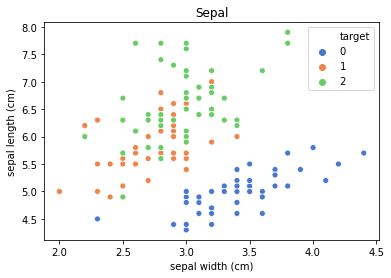

In [76]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal')
plt.show()

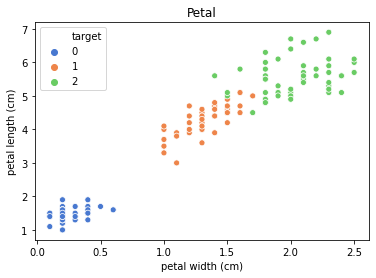

In [77]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

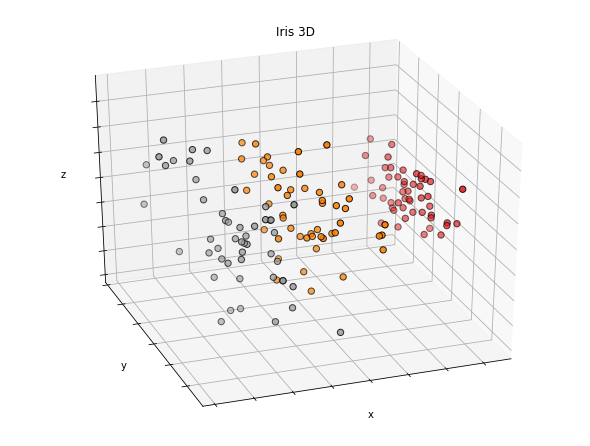

In [78]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'])

In [81]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [82]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

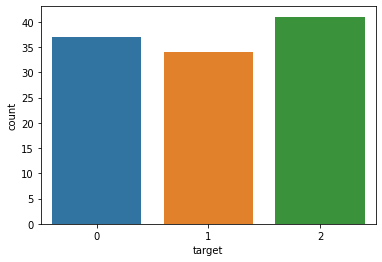

In [83]:
sns.countplot(y_train)

stratify: label의 클래스의 분포를 균등하게 배분

In [84]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

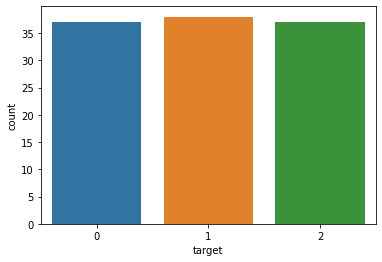

In [85]:
sns.countplot(y_train)

In [86]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [87]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

### Logistic Regression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

* 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법

LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

하지만, 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별하게 됩니다.

**one-vs-rest (OvR)**: K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별

**one-vs-one (OvO)**: 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

대부분 **OvsR 전략을 선호**합니다.

In [88]:
from sklearn.linear_model import LogisticRegression

**step 1: 모델 선언**

In [89]:
model = LogisticRegression()

**step 2: 모델 학습**

In [90]:
model.fit(x_train, y_train)

LogisticRegression()

**step 3: 예측**

In [91]:
prediction = model.predict(x_valid)

In [92]:
prediction[:5]

array([1, 0, 2, 2, 2])

**step 4: 평가**

In [93]:
(prediction == y_valid).mean()

0.9473684210526315

### SGDClassifier

**stochastic gradient descent (SGD)**: 확률적 경사 하강법

In [94]:
from IPython.display import Image

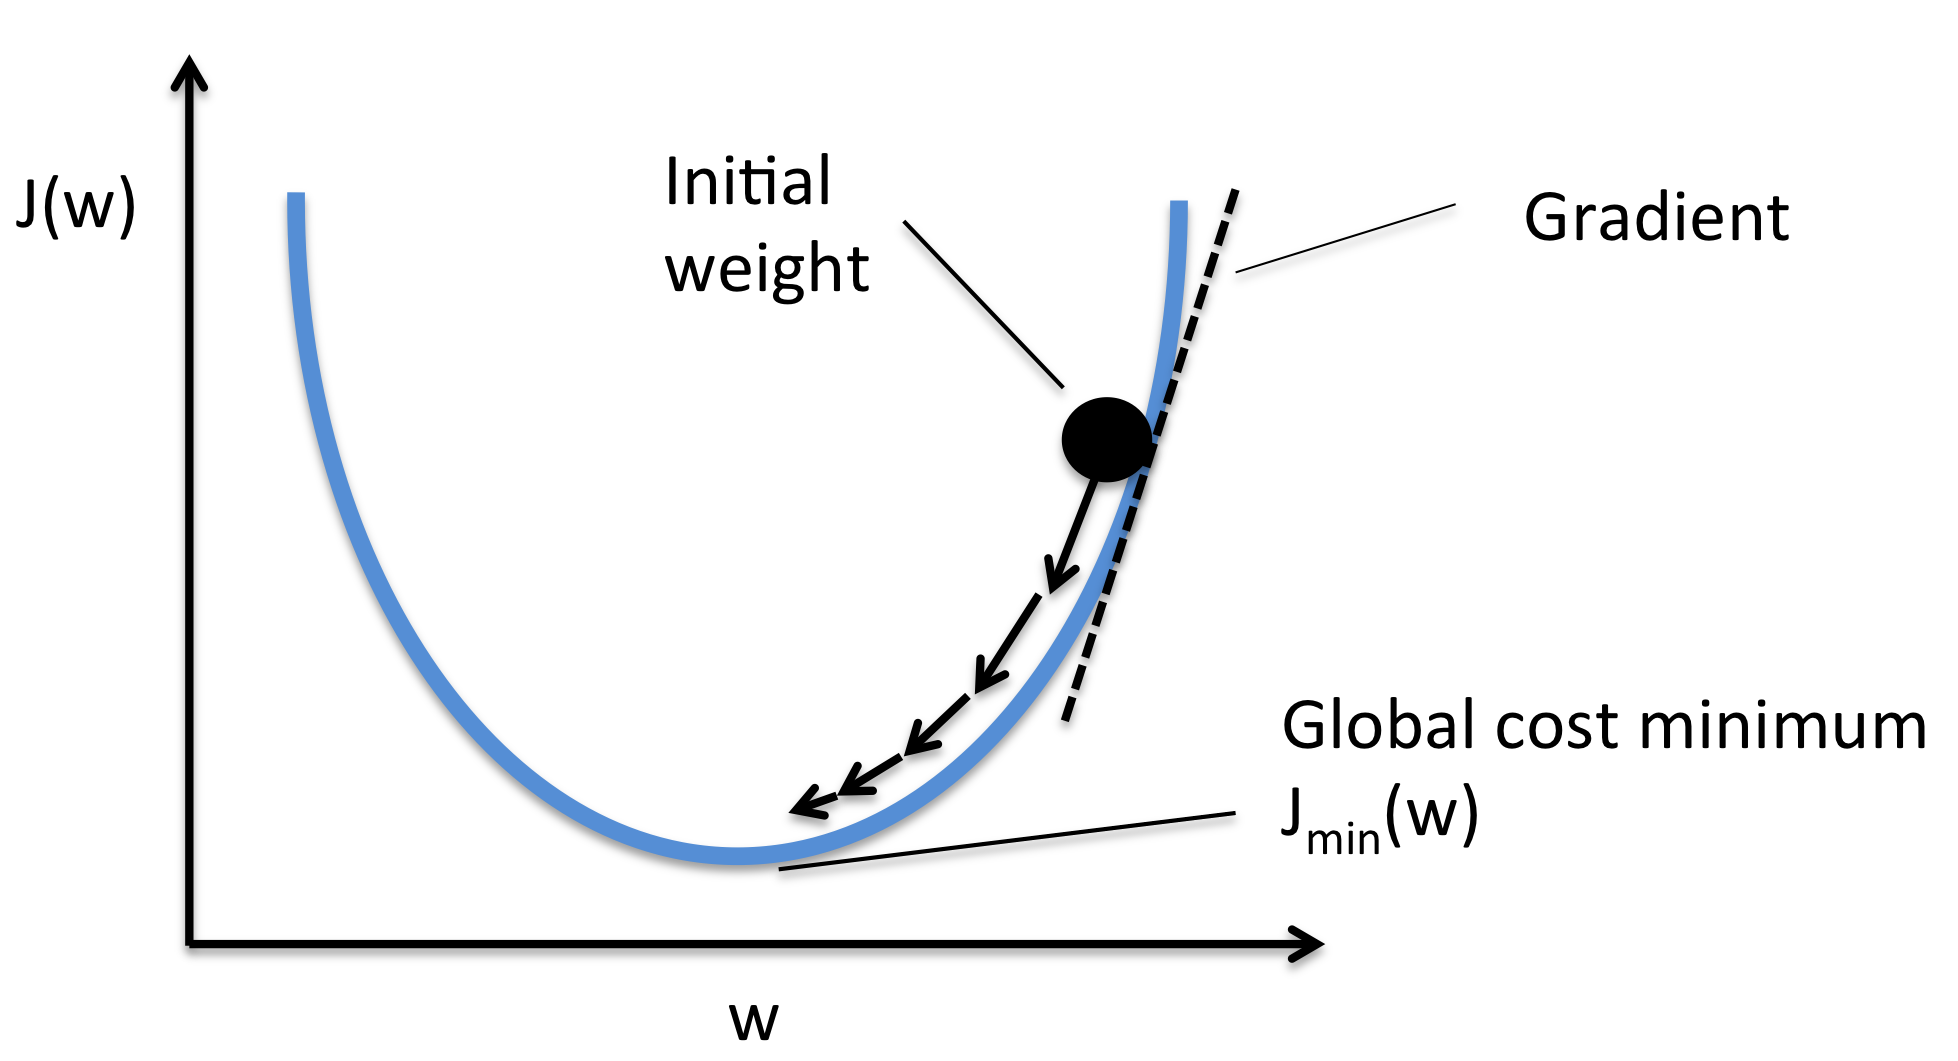

In [95]:
# 출처: https://machinelearningnotepad.wordpress.com/
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

[sklearn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [96]:
from sklearn.linear_model import SGDClassifier

**step 1: 모델 선언**

In [97]:
sgd = SGDClassifier(random_state=0)

**step 2: 모델 학습**

In [98]:
sgd.fit(x_train, y_train)

SGDClassifier(random_state=0)

**step 3: 예측**

In [99]:
prediction = sgd.predict(x_valid)

In [100]:
(prediction == y_valid).mean()

0.6842105263157895

### 하이퍼 파라미터 (hyper-parameter) 튜닝

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

각 알고리즘 별, hyper-parameter의 종류가 다양합니다.

모두 다 외워서 할 수는 없습니다! 문서를 보고 적절한 가설을 세운 다음 적용하면서 검증해야합니다.

(나중에는 이 또한 자동으로 할 수 있습니다)

* random_state: 하이퍼 파라미터 튜닝시, 고정할 것
* n_jobs=-1: CPU를 모두 사용 (학습속도가 빠름)

In [101]:
sgd = SGDClassifier(penalty='l1', random_state=0, n_jobs=-1)

In [102]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=0)

In [103]:
prediction = sgd.predict(x_valid)

In [104]:
(prediction == y_valid).mean()

0.8157894736842105

### KNeighborsClassifier

최근접 이웃 알고리즘

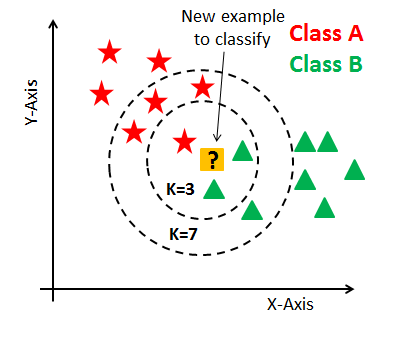

In [105]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
knc = KNeighborsClassifier()

In [127]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [128]:
knc_pred = knc.predict(x_valid)

In [129]:
(knc_pred == y_valid).mean()

0.9473684210526315

In [134]:
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(x_train, y_train)
knc_pred = knc.predict(x_valid)

In [133]:
(knc_pred == y_valid).mean()

0.9736842105263158

### 서포트 벡터 머신 (SVC)

* 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
* 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

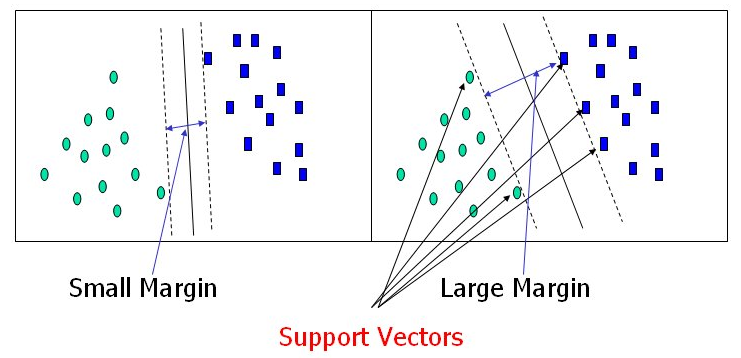

In [113]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

LogisticRegression과 같이 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

- OvsR 전략 사용

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [114]:
from sklearn.svm import SVC

In [115]:
svc = SVC(random_state=0,)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)

In [136]:
#파라미터 설정하는 다른 방법 
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('svc', SVC(gamma='auto'))])

In [117]:
(svc_pred == y_valid).mean()

0.9736842105263158

In [118]:
svc_pred[:5]

array([1, 0, 2, 2, 2])

각 클래스 별 확률값을 return 해주는 `decision_function()`

In [119]:
svc.decision_function(x_valid)[:5]

array([[-0.19942701,  2.23905912,  0.82954777],
       [ 2.22344727,  1.18160597, -0.25453798],
       [-0.23028142,  0.84016654,  2.25312505],
       [-0.23683886,  0.97131364,  2.23939936],
       [-0.22872087,  0.8728065 ,  2.24569219]])

### 의사 결정 나무 (Decision Tree)

스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

In [121]:
Image('https://www.researchgate.net/profile/Ludmila_Aleksejeva/publication/293194222/figure/fig1/AS:669028842487827@1536520314657/Decision-tree-for-Iris-dataset.png', width=500)

HTTPError: HTTP Error 403: Forbidden

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
dtc = DecisionTreeClassifier(random_state=0)

In [139]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [140]:
dtc_pred = dtc.predict(x_valid)

In [141]:
(dtc_pred == y_valid).mean()

0.9473684210526315

In [142]:
from sklearn.tree import export_graphviz
from subprocess import call

In [143]:
def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')

    # 생성된 .dot 파일을 .png로 변환
    
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png 출력
    return Image(filename = 'decistion-tree.png', width=500)

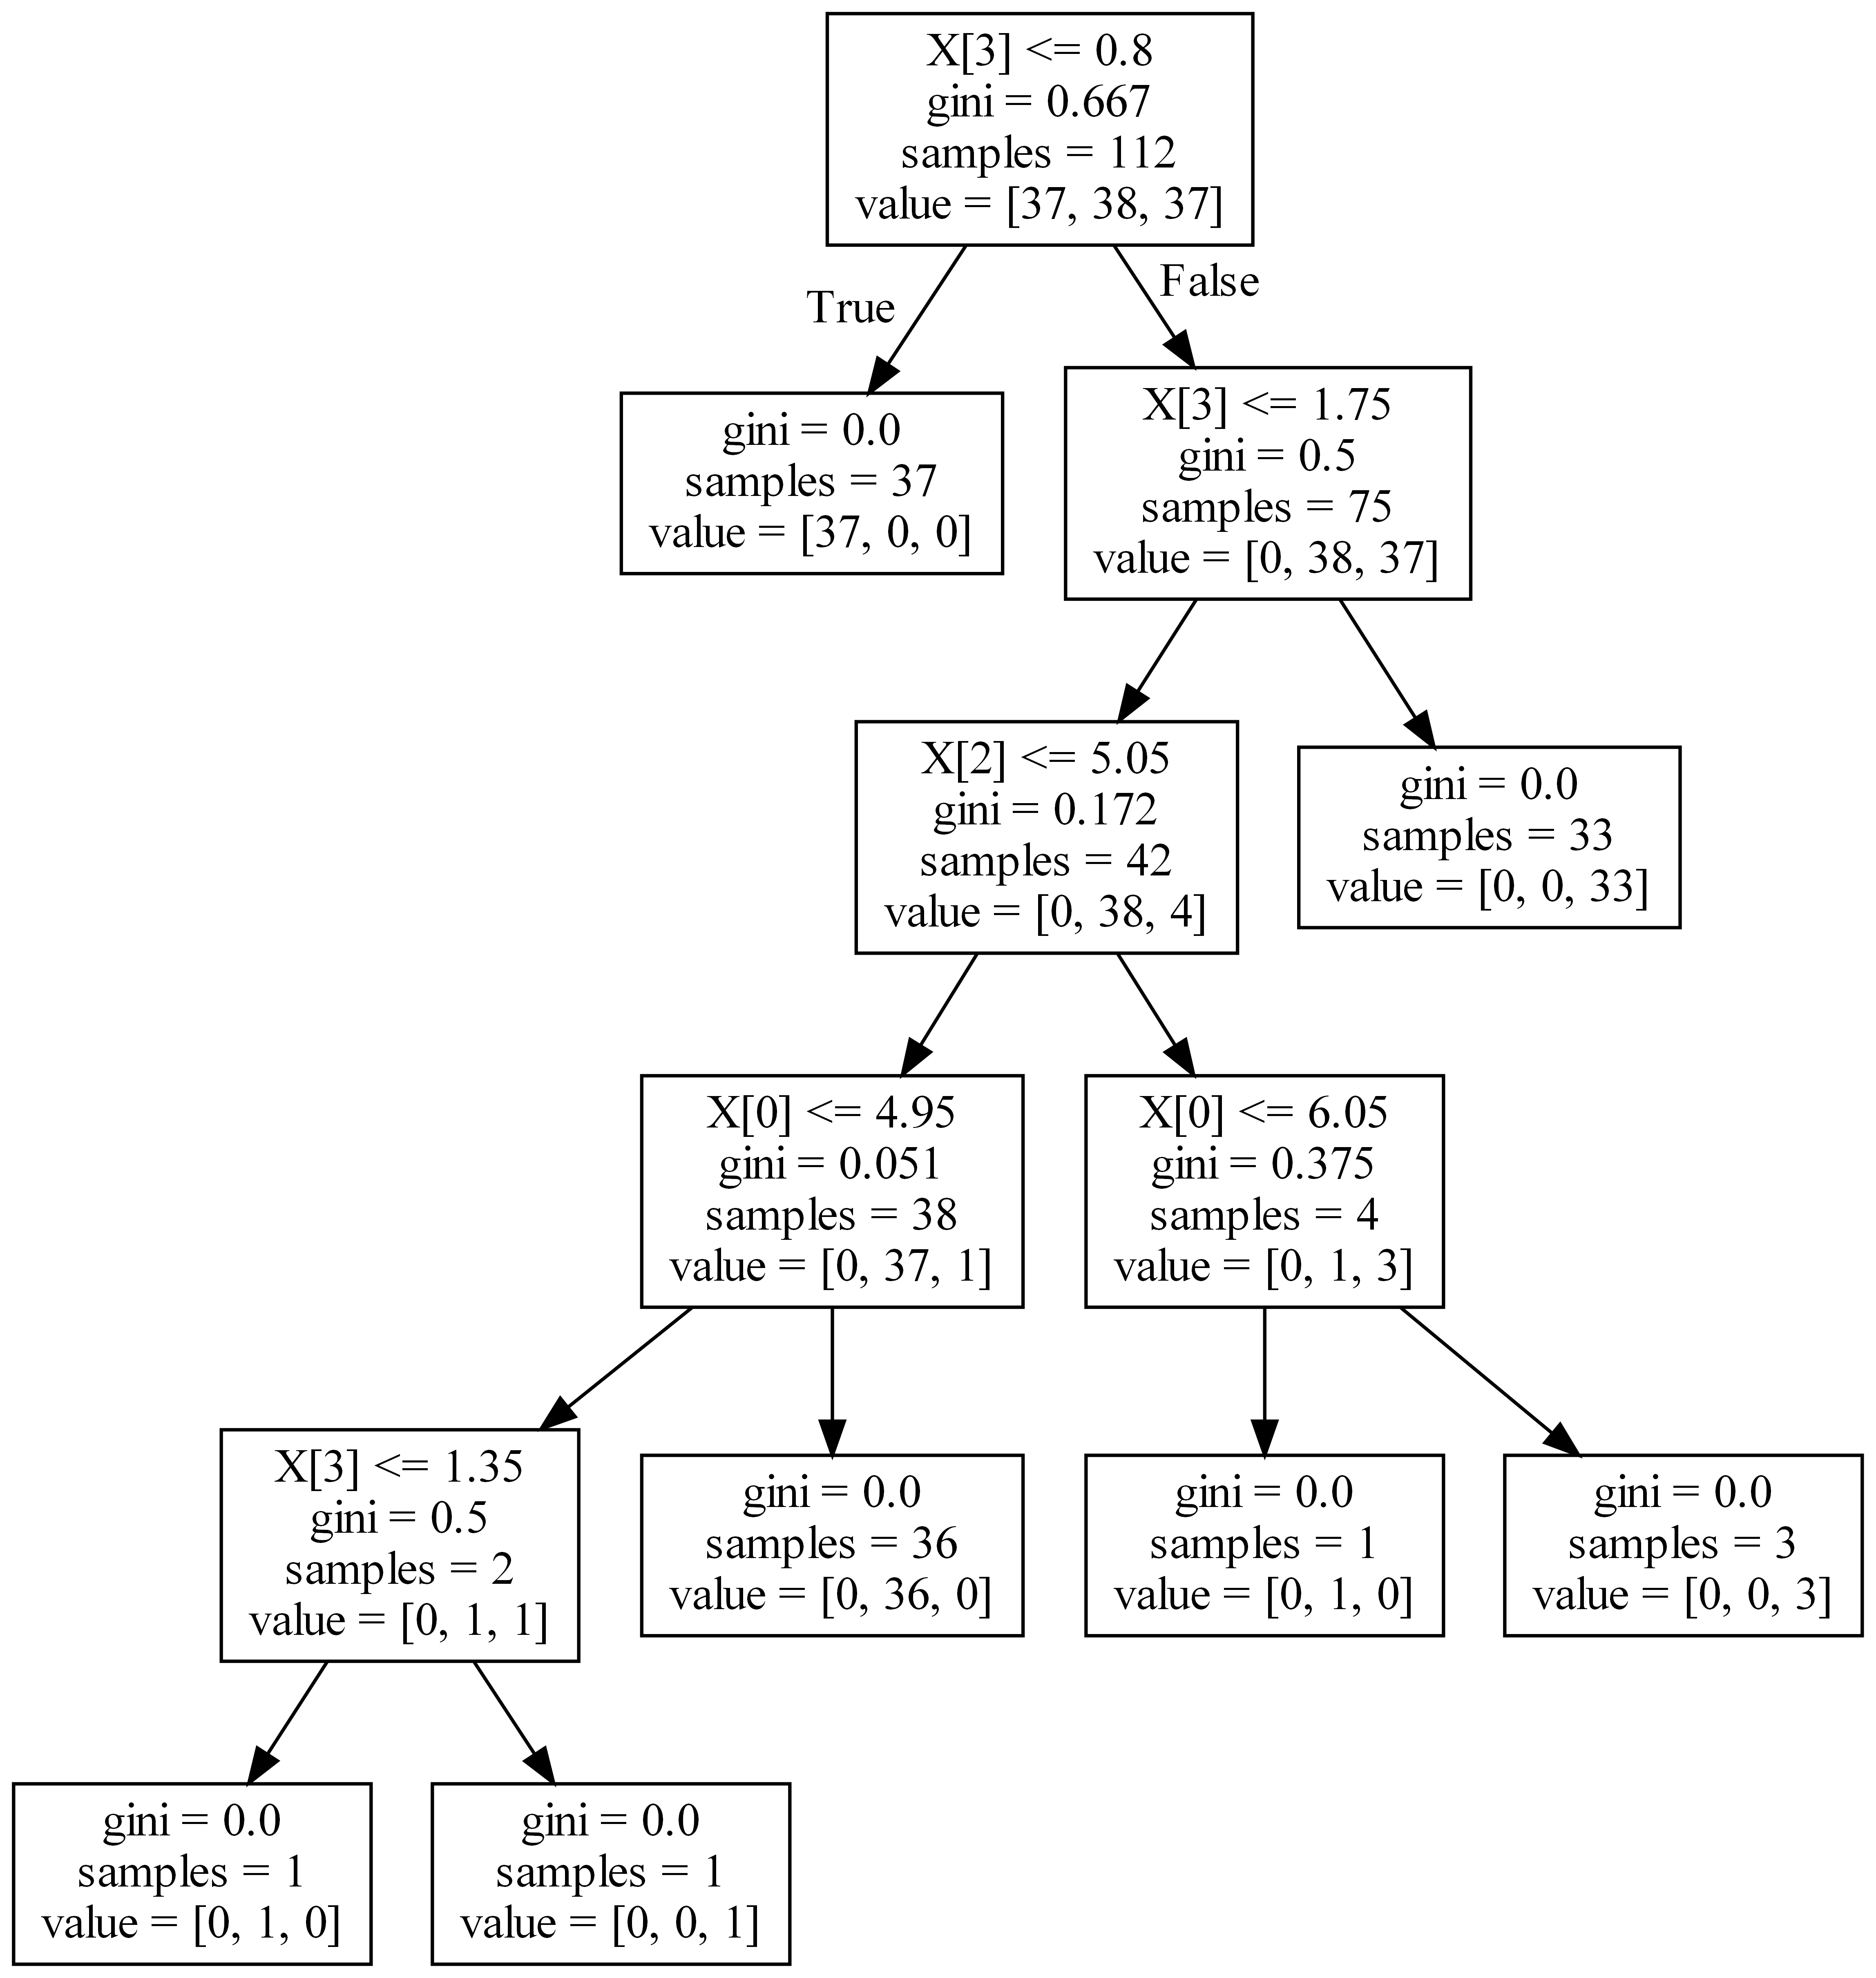

In [144]:
graph_tree(dtc)

gini계수: 불순도를 의미하며, 계수가 높을 수록 엔트로피가 크다는 의미하며

엔트로피가 크다는 의미는 쉽게 말해서, 클래스가 혼잡하게 섞여 있다는 뜻입니다.

In [ ]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

In [ ]:
graph_tree(dtc)

## 오차 (Error)

### 정확도의 함정

In [145]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

유방암 환자 데이터셋을 로드합니다.

**target**: 0: 악성종양, 1:양성종양

In [146]:
cancer = load_breast_cancer()

In [147]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [155]:
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

데이터 프레임을 생성합니다.

In [156]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [157]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [170]:
pos = df.loc[df['target']==1]
neg = df.loc[df['target']==0]

In [171]:
neg

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


양성 환자 **357개** + 악성 환자 **5개**

In [160]:
sample = pd.concat([pos, neg[:5]], sort=True)

In [161]:
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample['target'], random_state=42)

모델을 정의하고, 학습합니다.

In [162]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [163]:
(pred == y_test).mean()

0.978021978021978

In [164]:
my_prediction = np.ones(shape=y_test.shape)

In [165]:
(my_prediction == y_test).mean()

0.989010989010989

정확도만 놓고 본다면, 제가 만든 무조건 음성 환자로 예측하는 분류기가 성능이 좋습니다

하지만, 의사가 과연 **무조건 음성 환자로 예측해서 예측율 98.9% 로 말하는 의사**는 자질이 좋은 의사일까요?

정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 **위와 같은 오류**에 빠질 수 있습니다.

이를 보완하고 생겨난 지표들이 있습니다. 차차 알아보겠습니다.

### 오차 행렬 (confusion maxtix)

In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
confusion_matrix(y_test, pred)

array([[ 1,  0],
       [ 2, 88]], dtype=int64)

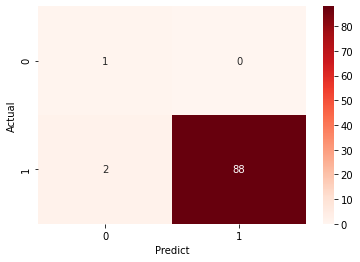

In [168]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds', )
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

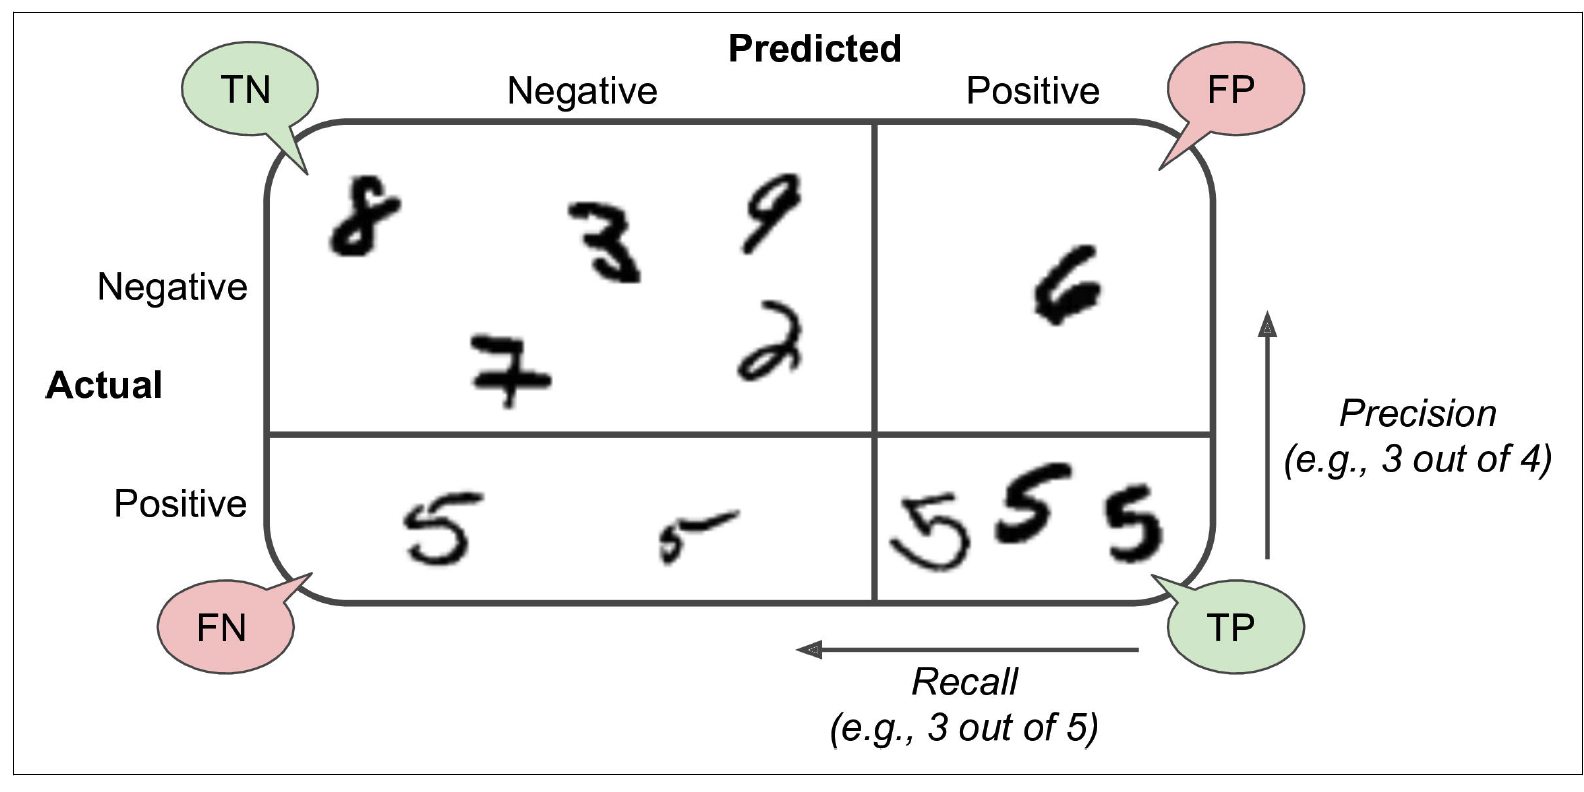

In [169]:
# 출처: https://dojinkimm.github.io
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png', width=500)

In [ ]:
from sklearn.metrics import precision_score, recall_score

### 정밀도 (precision)

양성 예측 정확도

TP / (TP + FP)

In [ ]:
precision_score(y_test, pred)

무조건 **양성**으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않습니다.

### 재현율 (recall)

TP / (TP + FN)

정확하게 감지한 **양성 샘플의 비율**입니다.

민감도 (sensitivity) 혹은 True Positive Rate (TPR)이라고도 불리웁니다.

In [ ]:
recall_score(y_test, pred)

In [ ]:
88/90

### f1 score

정밀도와 재현율의 **조화 평균**을 나타내는 지표입니다.

In [ ]:
Image('https://miro.medium.com/max/918/1*jCu9fNZS0hSRHVJ2cBTegg.png')

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, pred)